In [2]:
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
print(os.getcwd())
print(os.listdir(os.getcwd()))

C:\Users\LE HOANG NHAN\PycharmProjects\merging-dataframes -- Olympic data
['.idea', '.ipynb_checkpoints', 'auto-mpg.csv', 'axis_limits.png', 'Bruce_McCandless_II_during_EVA_in_1984.jpg', 'company-stock-movements-2010-2015-incl.csv', 'deep-learning-with-keras.ipynb', 'finch_beaks_1975.csv', 'finch_beaks_2012.csv', 'fish.csv', 'gapminder_tidy.csv', 'gm_2008_region.csv', 'hourly_wages.csv', 'house-votes-84.csv', 'Interactive Data Visualization with Bokeh.ipynb', 'iris.csv', 'lcd-digits.csv', 'merging-dataframes-- Olympic data.ipynb', 'percent-bachelors-degrees-women-usa.csv', 'Plotting 2D arrays.ipynb', 'seeds-width-vs-length.csv', 'seeds.csv', 'sine_mesh.png', "statistic with Darwin's finches.ipynb", 'stocks.csv', 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv', 'Summer Olympic medallists 1896 to 2008 - EDITIONS.csv', 'supervised-learning-with-scikit-learn.ipynb', 'unsupervised-learning.ipynb', 'venv', 'white-wine.csv', 'women degrees.ipynb', 'xlim_and_ylim.png']


In [3]:
# Create file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - EDITIONS.csv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path)

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City',  'Country']]

# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

In [4]:
#Loading IOC codes DataFrame

# Create the file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


In [11]:
# Building medals DataFrame

all_medalists = pd.read_csv("Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.csv")

# Import pandas
import pandas as pd

# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:
  
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = all_medalists[all_medalists['Edition'] == year]
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict,ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

              Athlete  NOC   Medal  Edition
0       HAJOS, Alfred  HUN    Gold     1896
1    HERSCHMANN, Otto  AUT  Silver     1896
2   DRIVAS, Dimitrios  GRE  Bronze     1896
3  MALOKINIS, Ioannis  GRE    Gold     1896
4  CHASAPIS, Spiridon  GRE  Silver     1896
                    Athlete  NOC   Medal  Edition
29211        ENGLICH, Mirko  GER  Silver     2008
29212  MIZGAITIS, Mindaugas  LTU  Bronze     2008
29213       PATRIKEEV, Yuri  ARM  Bronze     2008
29214         LOPEZ, Mijain  CUB    Gold     2008
29215        BAROEV, Khasan  RUS  Silver     2008


In [12]:
#Counting medals by country/edition in a pivot table

# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', values = 'Athlete', columns ='NOC' , aggfunc= "count")

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...  URS  URU  \
Edition                                                      ...             
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...  NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...  NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...  NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT  AZE  B

In [13]:
#Computing fraction of medals per Olympic edition

# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  ...  \
Edition                                                                   ...   
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN  ...   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN  ...   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN  ...   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN  ...   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN  ...   

NOC      URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition                                                              
1896     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN       NaN  
1912     NaN

In [14]:
#Computing percentage change in fraction of medals won

# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC  ...  URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0    ...  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1    ...  NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2    ...  NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3    ...  NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4    ...  NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AHO        ALG  ANZ       ARG        A

In [15]:
#Building hosts DataFrame


# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions , ioc_codes, how="left")

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition' , 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts= hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


In [16]:
#Reshaping for analysis


# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped['NOC']== 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


In [19]:
#Merging to compute influence:
#fractional change in the expanding mean of the percentage of 
#medals won for the host country in each Olympic edition.


# Merge reshaped and hosts: merged
merged = pd.merge(reshaped , hosts, how='inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


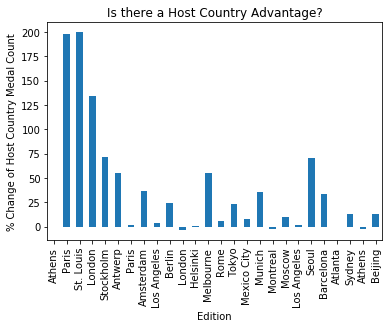

In [20]:
#Plotting influence of host country

# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()